'''
 -*- coding: utf-8 -*-
16.11. 2024. - 1.2.2025.
author: Dragoljub Perišić
verzija 5 kategorija - final 1.2
'''

## Predmet: Mašinsko učenje u astronomiji
## Predmetni nastavnik: prof. dr Anđelka Kovačević
## Student: Dragoljub Perišić
## Cilj ovog NoteBooka je kreiranje algoritma koji će automatski klasifikovati mala nebeska tela u 5 kategorija: Amor, Apollo, Atens, Apohele i Non NEO. Za algoritam mašinskog učenja odabran je Random Forest. Ulazni podaci preuzeti su sa sajta: https://minorplanetcenter.net/data. Ulazni podaci su pripremljenji za obradu pomoću 4 pomoćna programa (koji su navedeni na kraju notebooka). Iz skupa svih navedenih nebeskih tela odabrano je njih 40123 tako da u svakoj od kategorija bude objekata (ovo je moralo biti urađeno pažljivo jer je polaznih 1.4 miliona tela bilo samo 34 Apohele objekta - koji su svi odabrani u ulazni fajl - input40K.txt). Objekti su podeljeni u dva skupa (trening i test) od po 20000 iz razloga "ručne provere - druge provere" tačnosti Random Forest klasifikacije. Od prvih 20000 objekata 80% je bilo uzeto za treniranje algoritma a ostalih 20% za test. 

## Izvršavanje algoritma (sa procenom tačnosti) daje rezultat: "Tačnost Random Forest Klasifikatora: 99.00%". Nakon druge provere (sa drugih 20000 objekata) rezultat je bio: "Tačnost procene je 0.988" što se dobro poklapa sa prvom proverom. Rezultati su predstavljeni i grafički (a vs e - Velika poluosa vs ekscentricitet), a pored tih grafika takođe je prikazan i grafik a vs i (Velika poluosa vs inklinacija)

## Od ulaznih podataka za svaki objekat korišćeni su sledeći podaci:
a- Velika poluosa
q- Perihel   - q=a(1−e)
Q -Afel      - Q=a(1+e)

## Klasifikacija je urađena na osnovu sledećih formula:

Amor =  1.017 < q < 1.3
Apollo = q < 1.017 i a > 1
Atens = a < 1 i Q > 0.983
Apohele = a < 1 i Q < 0.983
NonNEO = q > 1.3

## Takođe je korišćenja i filtracija objekata (Velika poluosa manja od 6 AU) jedino iz razloga dobijanja boljeg grafičkog predstavljanja podataka


In [610]:
import copy

# Definicija  SmallBody class

In [612]:
class SmallBody:
    def __init__(self, Desn, H, G, Epoch, M, Peri, Node, PEi, PEe, n, PEa, PEq, PEQ):
        self.Desn = Desn
        self.H = H
        self.G = G
        self.Epoch = Epoch
        self.M = M
        self.Peri = Peri
        self.Node = Node
        self.PEi = PEi
        self.PEe = PEe
        self.n = n
        self.PEa = PEa
        self.PEq = PEq
        self.PEQ = PEQ

## funkcija koja učitava objekte smallbody u listu MyListOfSB

In [614]:
def loadSmallBodies(input_file):
    MyListOfSB = []
    try:
        with open(input_file, 'r') as infile:
            header = infile.readline()  # preskoči heder
            for line in infile:
                columns = line.split()
                if len(columns) >= 13:
                    try:
                        # kreira  SmallBody objekat
                        sb = SmallBody(
                            Desn=columns[0],
                            H=float(columns[1]),
                            G=float(columns[2]),
                            Epoch=columns[3],
                            M=float(columns[4]),
                            Peri=float(columns[5]),
                            Node=float(columns[6]),
                            PEi=float(columns[7]),
                            PEe=float(columns[8]),
                            n=float(columns[9]),
                            PEa=float(columns[10]),
                            PEq=float(columns[11]),
                            PEQ=float(columns[12])
                        )
                        MyListOfSB.append(sb)
                    except ValueError:
                        continue  # Bitno : preskače  linije u slučaju loše konverzije u float
    except FileNotFoundError:
        print(f"Error: File {input_file} not found.")
    return MyListOfSB

## Glavni deo

In [616]:
input_file = "input40K.txt"

### polazni fajl je sa sajta MPCORB.DAT sa sajta https://minorplanetcenter.net/data 21.dec.2024.<br>
### fajl input40K.txt sadrži 40123 objekata koji je generisan pomoću pomoćnih programa koji su navedeni<br>
### ispod glavnog programa .. fajl je generisan tako da sadrži tela u svih 5 kategorija

In [618]:
MyListOfSB = loadSmallBodies(input_file)

### Create the five lists

In [620]:
MylistOfAmor = [copy.deepcopy(obj) for obj in MyListOfSB if 1.017 < float(obj.PEq) < 1.3]
MylistOfApollo = [copy.deepcopy(obj) for obj in MyListOfSB if float(obj.PEq) < 1.017 and float(obj.PEa) > 1]
MylistOfAtens = [copy.deepcopy(obj) for obj in MyListOfSB if float(obj.PEa) < 1 and float(obj.PEQ) > 0.983]
MylistOfApohele = [copy.deepcopy(obj) for obj in MyListOfSB if float(obj.PEa) < 1 and float(obj.PEQ) < 0.983]
MylistofNonNEO = [copy.deepcopy(obj) for obj in MyListOfSB if float(obj.PEq) > 1.3]

### Count the objects in each list

In [622]:
countAmor = len(MylistOfAmor)
countApollo = len(MylistOfApollo)
countAtens = len(MylistOfAtens)
countApohele = len(MylistOfApohele)
countNonNEO = len(MylistofNonNEO)

In [623]:
countPocetno=len(MyListOfSB)
countUkupno=countAmor+countApollo+countAtens+countApohele+countNonNEO

### Print the results

In [625]:
print(f"countAmor: {countAmor}")
print(f"countApollo: {countApollo}")
print(f"countAtens: {countAtens}")
print(f"countApohele: {countApohele}")
print(f"countNonNEO: {countNonNEO}")
print(f"Sum: {countAmor + countApollo + countAtens + countApohele + countNonNEO}")

countAmor: 13128
countApollo: 20905
countAtens: 2920
countApohele: 34
countNonNEO: 2964
Sum: 39951


## filtriranje 

In [627]:
MyListOfSB = [obj for obj in MyListOfSB if float(obj.PEa) < 6]

# podela na test i trening <br>
### MylistOfSB lista je podeljenja na dva jednaka dela

In [629]:
half = len(MyListOfSB) // 2 
print(f"Ukupno tela: {len(MyListOfSB)}")
MylistOfSBTraining = MyListOfSB[:half]  # prva polovina za trening 
MylistOfSBTest = MyListOfSB[half:]  # druga polovina za test

Ukupno tela: 39940


In [630]:
print(f"Training list size: {len(MylistOfSBTraining)}")
print(f"Test list size: {len(MylistOfSBTest)}")

Training list size: 19970
Test list size: 19970


### podela na test i trening svake liste ponaosob

In [632]:
half = len(MylistOfAmor) // 2  
print(f"Ukupno tela: {len(MylistOfAmor)}")
MylistOfAmorTraining = MylistOfAmor[:half]  
MylistOfAmorTest = MylistOfAmor[half:]  
print(f"Training list size: {len(MylistOfAmorTraining)}")
print(f"Test list size: {len(MylistOfAmorTest)}")

Ukupno tela: 13128
Training list size: 6564
Test list size: 6564


In [633]:
half = len(MylistOfApollo) // 2  
print(f"Ukupno tela: {len(MylistOfApollo)}")
MylistOfApolloTraining = MylistOfApollo[:half]  
MylistOfApolloTest = MylistOfApollo[half:]  
print(f"Training list size: {len(MylistOfApolloTraining)}")
print(f"Test list size: {len(MylistOfApolloTest)}")

Ukupno tela: 20905
Training list size: 10452
Test list size: 10453


In [634]:
half = len(MylistOfAtens) // 2  
print(f"Ukupno tela: {len(MylistOfAtens)}")
MylistOfAtensTraining = MylistOfAtens[:half]  
MylistOfAtensTest = MylistOfAtens[half:]  
print(f"Training list size: {len(MylistOfAtensTraining)}")
print(f"Test list size: {len(MylistOfAtensTest)}")

Ukupno tela: 2920
Training list size: 1460
Test list size: 1460


In [635]:
half = len(MylistOfApohele) // 2  
print(f"Ukupno tela: {len(MylistOfApohele)}")
MylistOfApoheleTraining = MylistOfApohele[:half]  
MylistOfApoheleTest = MylistOfApohele[half:]  
print(f"Training list size: {len(MylistOfApoheleTraining)}")
print(f"Test list size: {len(MylistOfApoheleTest)}")

Ukupno tela: 34
Training list size: 17
Test list size: 17


In [636]:
half = len(MylistofNonNEO) // 2  
print(f"Ukupno tela: {len(MylistofNonNEO)}")
MylistofNonNEOTraining = MylistofNonNEO[:half]  
MylistofNonNEOTest = MylistofNonNEO[half:]  
print(f"Training list size: {len(MylistofNonNEOTraining)}")
print(f"Test list size: {len(MylistofNonNEOTest)}")

Ukupno tela: 2964
Training list size: 1482
Test list size: 1482


In [637]:
granica =10 ### 10 astronomskih jedinica za veliku poluosu

In [638]:
MylistOfAmorTraining = [obj for obj in MylistOfAmorTraining if float(obj.PEa) < granica]
MylistOfAmorTest = [obj for obj in MylistOfAmorTest if float(obj.PEa) < granica]

In [639]:
MylistOfApolloTraining = [obj for obj in MylistOfApolloTraining if float(obj.PEa) < granica]
MylistOfApolloTest = [obj for obj in MylistOfApolloTest if float(obj.PEa) < granica]

In [640]:
MylistOfAtensTraining = [obj for obj in MylistOfAtensTraining if float(obj.PEa) < granica]
MylistOfAtensTest = [obj for obj in MylistOfAtensTest if float(obj.PEa) < granica]

In [641]:
MylistOfApoheleTraining = [obj for obj in MylistOfApoheleTraining if float(obj.PEa) < granica]
MylistOfApoheleTest = [obj for obj in MylistOfApoheleTest if float(obj.PEa) < granica]

In [642]:
MylistofNonNEOTraining = [obj for obj in MylistofNonNEOTraining if float(obj.PEa) < granica]
MylistofNonNEOTest = [obj for obj in MylistofNonNEOTest if float(obj.PEa) < granica]

### SemiMajor Axis vs inclination  a vs i

In [644]:
import matplotlib.pyplot as plt

### Convert the data into arrays

In [646]:
xs = [obj.PEa for obj in MyListOfSB if obj.PEa is not None]
resX = [float(ele) for ele in xs]
ys = [obj.PEi for obj in MyListOfSB if obj.PEi is not None]
resY = [float(ele) for ele in ys]

### minimum i maximum za x and y 

In [648]:
min_x, max_x = min(resX), max(resX)
min_y, max_y = min(resY), max(resY)

In [649]:
print(f"X range: {min_x} to {max_x}")
print(f"Y range: {min_y} to {max_y}")

X range: 0.4617462 to 5.7759437
Y range: 0.00598 to 154.34856


Adjust the scatter plot size dynamically based on the range

In [651]:
marker_size = max(1, 100 / len(resX))  # Dynamic marker size; smaller if too many points

### Labele i naslov

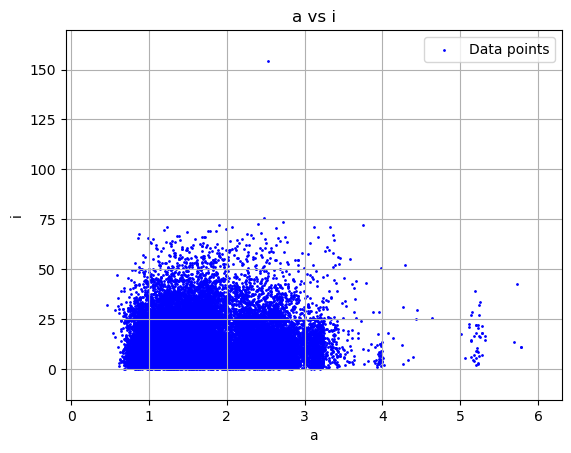

In [653]:
plt.xlabel("a")
plt.ylabel("i")
plt.title("a vs i")
plt.grid(True)
plt.scatter(resX, resY, s=marker_size, color='blue', label='Data points')
plt.legend()
plt.xlim(min_x - 0.1 * (max_x - min_x), max_x + 0.1 * (max_x - min_x))  
plt.ylim(min_y - 0.1 * (max_y - min_y), max_y + 0.1 * (max_y - min_y))  
plt.show()

### SemiMajor Axis vs eccentricity (a vs e)

In [655]:
import matplotlib.pyplot as plt300

In [656]:
xs = [obj.PEa for obj in MyListOfSB]
resX = [float(ele) for ele in xs]
ys = [obj.PEe for obj in MyListOfSB]
resY = [float(ele) for ele in ys]

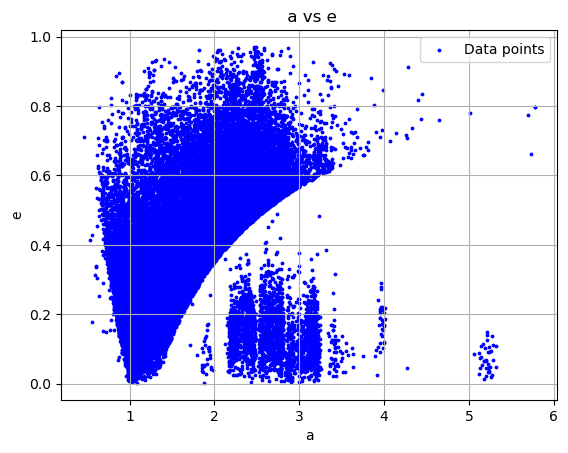

In [657]:
plt300.xlabel("a")
plt300.ylabel("e")
plt300.title(" a vs e")
# crtanje tačaka
plt300.scatter(resX, resY, s=3, color='blue', label='Data points')
plt300.legend()
# prikaži plot
plt300.grid(True)
plt300.show()

## 5 Kategorija


<br>
MylistOfAmor = [copy.deepcopy(obj) for obj in MylistOfSBTraining if float(obj.PEq) > 1.017 and float(obj.PEq) <1.3]<br>
MylistOfApollo = [copy.deepcopy(obj) for obj in MylistOfSBTraining if float(obj.PEq) < 1.017 and float(obj.PEa) >1]<br>
MylistOfAtens = [copy.deepcopy(obj) for obj in MylistOfSBTraining if float(obj.PEa) < 1 and float(obj.PEQ) >0.983]<br>
MylistOfApohele = [copy.deepcopy(obj) for obj in MylistOfSBTraining if float(obj.PEa) < 1 and float(obj.PEQ) < 0.983]<br>
MylistofNonNEO  = [copy.deepcopy(obj) for obj in MylistOfSBTraining if float(obj.PEq) > 1.3 ]<br>
MylistOfAmorTest = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEq) > 1.017 and float(obj.PEq) <1.3]<br>
MylistOfApolloTest = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEq) < 1.017 and float(obj.PEa) >1]<br>
MylistOfAtensTest = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEa) < 1 and float(obj.PEQ) >0.983]<br>
MylistOfApoheleTest = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEa) < 1 and float(obj.PEQ) < 0.983]<br>
MylistofNonNEOTest  = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEq) > 1.3 ]<br>


In [660]:
countAmor   =len(MylistOfAmor)
countApollo =len(MylistOfApollo)
countAtens  =len(MylistOfAtens)
countApohele=len(MylistOfApohele)
countNonNEO =len(MylistofNonNEO)

In [661]:
countAmorTest   =len(MylistOfAmorTest)
countApolloTest =len(MylistOfApolloTest)
countAtensTest  =len(MylistOfAtensTest)
countApoheleTest=len(MylistOfApoheleTest)
countNonNEOTest =len(MylistofNonNEOTest)

In [662]:
countPocetno=len(MyListOfSB)
countUkupno=countAmor+countApollo+countAtens+countApohele+countNonNEO

In [663]:
print ("Pocetni broj NEO tela: "+ str(countPocetno))
print ("Ukupno posle filtracije (a<4 AU) ): "+ str(countUkupno))

Pocetni broj NEO tela: 39940
Ukupno posle filtracije (a<4 AU) ): 39951


In [664]:
print ("countAmor: count  "+ str(countAmor))
print ("countApollo: count  "+ str(countApollo))
print ("countAtens: count  "+ str(countAtens))
print ("countApohele: count  "+ str(countApohele))
print ("MyListofNonNEO: count  "+ str(countNonNEO))

countAmor: count  13128
countApollo: count  20905
countAtens: count  2920
countApohele: count  34
MyListofNonNEO: count  2964


In [665]:
print ("countAmorTest: count  "+ str(countAmorTest))
print ("countApolloTest: count  "+ str(countApolloTest))
print ("countAtensTest: count  "+ str(countAtensTest))
print ("countApoheleTest: count  "+ str(countApoheleTest))
print ("MyListofNonNEOTest: count  "+ str(countNonNEOTest))

countAmorTest: count  6561
countApolloTest: count  10453
countAtensTest: count  1460
countApoheleTest: count  17
MyListofNonNEOTest: count  1481


### semimajor axis vs eccentricity za svih 5 kategorija

In [667]:
import matplotlib.pyplot as plt300

### konverzija lista u niz

In [669]:
xs1 = [obj.PEa for obj in MylistOfAmorTraining]
resX1 = [float(ele) for ele in xs1]
ys1 = [obj.PEe for obj in MylistOfAmorTraining]
resY1 = [float(ele) for ele in ys1]

In [670]:
xs2 = [obj.PEa for obj in MylistOfApolloTraining]
resX2 = [float(ele) for ele in xs2]
ys2 = [obj.PEe for obj in MylistOfApolloTraining]
resY2 = [float(ele) for ele in ys2]

In [671]:
xs3 = [obj.PEa for obj in MylistOfAtensTraining]
resX3 = [float(ele) for ele in xs3]
ys3 = [obj.PEe for obj in MylistOfAtensTraining]
resY3 = [float(ele) for ele in ys3]

In [672]:
xs4 = [obj.PEa for obj in MylistOfApoheleTraining]
resX4 = [float(ele) for ele in xs4]
ys4 = [obj.PEe for obj in MylistOfApoheleTraining]
resY4 = [float(ele) for ele in ys4]

In [673]:
xs5 = [obj.PEa for obj in MylistofNonNEOTraining]
resX5 = [float(ele) for ele in xs5]
ys5 = [obj.PEe for obj in MylistofNonNEOTraining]
resY5 = [float(ele) for ele in ys5]

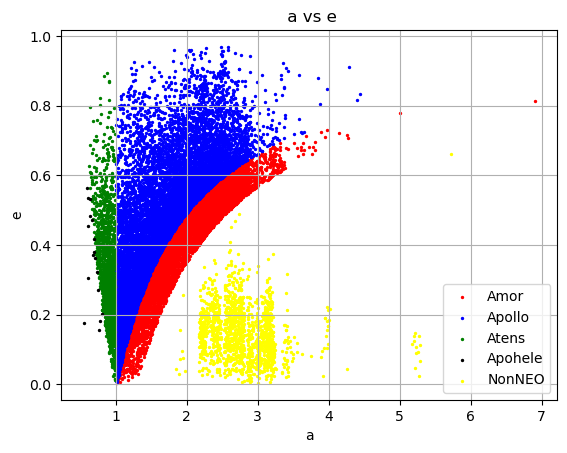

In [674]:
plt300.xlabel("a")
plt300.ylabel("e")
plt300.title(" a vs e")
# crtanje tačaka
plt300.scatter(resX1, resY1, s=2 ,c='red', label='Amor')
plt300.scatter(resX2, resY2, s=2 ,c='blue', label='Apollo')
plt300.scatter(resX3, resY3, s=2 ,c='green', label='Atens')
plt300.scatter(resX4, resY4, s=2 ,c='black', label='Apohele')
plt300.scatter(resX5, resY5, s=2 ,c='yellow', label='NonNEO')
plt300.legend()
plt300.grid(True)
plt300.show()

# random forest ML 

In [676]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare data

In [678]:
list1 = [(float(obj.PEa), float(obj.PEe)) for obj in MylistOfAmorTraining]
list2 = [(float(obj.PEa), float(obj.PEe)) for obj in MylistOfApolloTraining]
list3 = [(float(obj.PEa), float(obj.PEe)) for obj in MylistOfAtensTraining]
list4 = [(float(obj.PEa), float(obj.PEe)) for obj in MylistOfApoheleTraining]
list5 = [(float(obj.PEa), float(obj.PEe)) for obj in MylistofNonNEOTraining]

### Combine all data into one dataset with labels

Tačnost Random Forest Klasifikatora: 99.00%


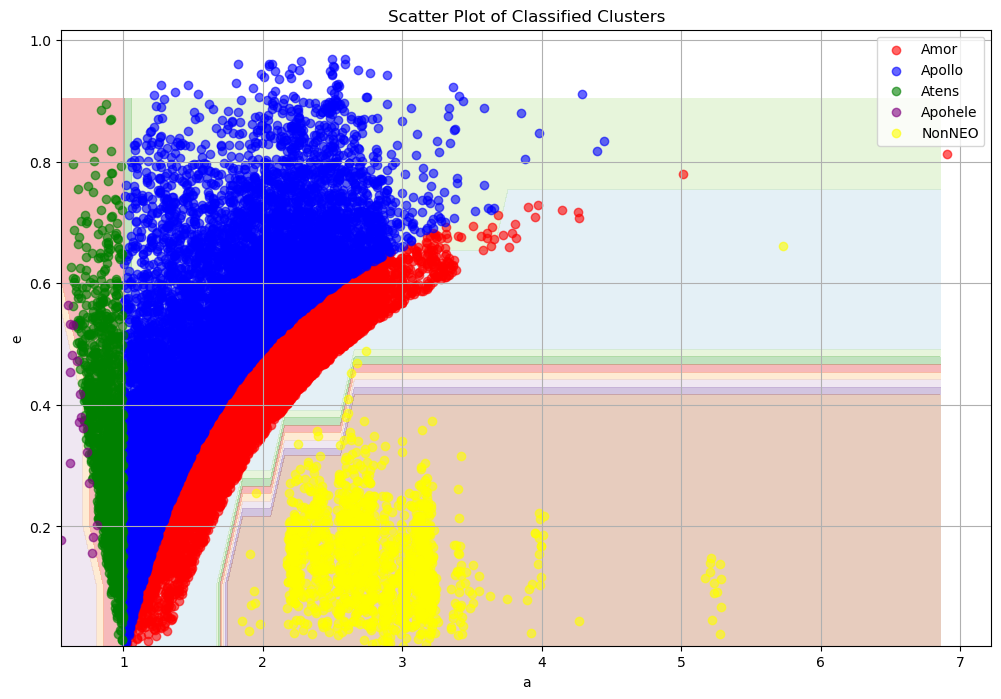

In [680]:
X = np.array(list1 + list2 + list3 + list4 + list5)  # Features
y = np.array([0] * len(list1) + [1] * len(list2) + [2] * len(list3) + [3] * len(list4)+ [4] * len(list5))  # Labels
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
# Predict on the test set
y_pred = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Tačnost Random Forest Klasifikatora: {accuracy * 100:.2f}%")
# Plot decision boundaries and clusters
plt.figure(figsize=(12, 8))
# Create a mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# Predict for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#### Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
###############plt.contour(xx, yy, Z, colors='black', linewidths=3)  # Black borders for cluster boundaries
# Scatter plot for each cluster
labels = ['Amor', 'Apollo', 'Atens', 'Apohele', 'NonNEO']
colors = ['red', 'blue', 'green', 'purple', 'yellow']
for cluster in range(5):
    plt.scatter(
        X[y == cluster, 0],
        X[y == cluster, 1],
        label=f"{labels[cluster]}",
        alpha=0.6,
        color=colors[cluster]
    )
##########plt.title("Scatter Plot of Classified Clusters with Decision Boundaries")
plt.title("Scatter Plot of Classified Clusters")
plt.xlabel("a")
plt.ylabel("e")
plt.legend()
plt.grid(True)
plt.show()

## moja provera preciznosti random foresta


<br>
MylistOfAmorTest = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEq) > 1.017 and float(obj.PEq) <1.3]<br>
MylistOfApolloTest = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEq) < 1.017 and float(obj.PEa) >1]<br>
MylistOfAtensTest = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEa) < 1 and float(obj.PEQ) >0.983]<br>
MylistOfApoheleTest = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEa) < 1 and float(obj.PEQ) < 0.983]<br>
MylistofNonNEOTest  = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEq) > 1.3 ]<br>


## provera

In [684]:
import numpy as np

In [685]:
points = np.array([(float(obj.PEa), float(obj.PEe)) for obj in MylistOfAmorTest])
predicted_clusters = clf.predict(points)
count_cluster_0 = np.sum(predicted_clusters == 0)
print(f"Broj tačaka u klasteru 0: {count_cluster_0}")
print("Length of MylistOfAmorTest is " + str(len(MylistOfAmorTest)))

Broj tačaka u klasteru 0: 6423
Length of MylistOfAmorTest is 6561


In [686]:
points = np.array([(float(obj.PEa), float(obj.PEe)) for obj in MylistOfApolloTest])
predicted_clusters = clf.predict(points)
count_cluster_1 = np.sum(predicted_clusters == 1)
print(f"Broj tačaka u klasteru 1: {count_cluster_1}")
print("Length of MylistOfApolloTest is " + str(len(MylistOfApolloTest)))

Broj tačaka u klasteru 1: 10369
Length of MylistOfApolloTest is 10453


In [687]:
points = np.array([(float(obj.PEa), float(obj.PEe)) for obj in MylistOfAtensTest])
predicted_clusters = clf.predict(points)
count_cluster_2 = np.sum(predicted_clusters == 2)
print(f"Broj tačaka u klasteru 2: {count_cluster_2}")
print("Length of MylistOfAtensTest is " + str(len(MylistOfAtensTest)))

Broj tačaka u klasteru 2: 1459
Length of MylistOfAtensTest is 1460


In [688]:
points = np.array([(float(obj.PEa), float(obj.PEe)) for obj in MylistOfApoheleTest])
predicted_clusters = clf.predict(points)
count_cluster_3 = np.sum(predicted_clusters == 3)
print(f"Broj tačaka u klasteru 3: {count_cluster_3}")
print("Length of MylistOfApoheleTest is " + str(len(MylistOfApoheleTest)))

Broj tačaka u klasteru 3: 10
Length of MylistOfApoheleTest is 17


In [689]:
points = np.array([(float(obj.PEa), float(obj.PEe)) for obj in MylistofNonNEOTest])
predicted_clusters = clf.predict(points)
count_cluster_4 = np.sum(predicted_clusters == 4)
print(f"Broj tačaka u klasteru 4: {count_cluster_4}")
print("Length of MylistofNonNEOTest is " + str(len(MylistofNonNEOTest)))

Broj tačaka u klasteru 4: 1476
Length of MylistofNonNEOTest is 1481


In [690]:
sumForProcena = count_cluster_0 + count_cluster_1 + count_cluster_2 +count_cluster_3 + count_cluster_4
print("Ukupni broj Tela koji je dobro određen " + str(sumForProcena) )
print("Ukupan broj tela za testiranje je " + str(len(MylistOfSBTest)))

Ukupni broj Tela koji je dobro određen 19737
Ukupan broj tela za testiranje je 19970


In [691]:
print (" Tačnost procene je "+ str (float (sumForProcena /len(MylistOfSBTest)) ) )

 Tačnost procene je 0.9883324987481222


####################################################<br>
## pomoćni programi za pripremu ulaznih podataka<br>
####################################################

 ### 01 isecanje kolona


<br>
import os<br>
# Program to process a file and retain only the first 11 columns, align them, and save to a new file<br>
input_file = "uzorak za chatgptSVI10ktxtSVE.txt"  # Input file name<br>
output_file = "out.txt"  # Output file name<br>
try:<br>
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:<br>
        for line in infile:<br>
            # Split the line into columns and extract the first 11<br>
            columns = line.split()<br>
            selected_columns = columns[:11]<br>
            # Align columns by joining with spaces<br>
            aligned_line = ' '.join(f"{col:<12}" for col in selected_columns).rstrip()<br>
            outfile.write(aligned_line + '\n')<br>
    print(f"Processing complete. Output written to {output_file}")<br>
except FileNotFoundError:<br>
    print(f"Error: File {input_file} not found.")<br>
except Exception as e:<br>
    print(f"An error occurred: {e}")<br>
    <br>
    <br>
uzorak fajla posle isecanje<br>
Des'n        H            G            Epoch        M            Peri.        Node         Incl.        e            n            a<br>
00001        3.34         0.15         K24AH        145.84905    73.28579     80.25414     10.58790     0.0791840    0.21418047   2.7666197<br>
00002        4.11         0.15         K24AH        126.06756    310.89226    172.90614    34.92186     0.2304384    0.21374870   2.7703442<br>
00003        5.18         0.15         K24AH        127.32529    247.81975    169.83829    12.98815     0.2561092    0.22588717   2.6701869<br>
00004        3.25         0.15         K24AH        278.02316    151.67629    103.70474    7.14398      0.0900011    0.27169443   2.3609252<br>
00005        6.99         0.15         K243V        350.98291    359.23648    141.46063    5.35914      0.1872507    0.23840266   2.5758979<br>
00006        5.61         0.15         K24AH        248.27292    239.64813    138.61983    14.73436     0.2024234    0.26082989   2.4260392    <br>
    <br>


 ### 02 dodavanje q i Q kolona


<br>
import os<br>
# Program to process a file, calculate q and Q, and save the results in a formatted output file<br>
def calculate_q_and_Q(input_file, output_file):<br>
    try:<br>
        with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:<br>
            header = infile.readline()<br>
            outfile.write(header.strip() + "    q           Q\n")  # Write header with new columns<br>
            for line in infile:<br>
                # Split the line into columns<br>
                columns = line.split()<br>
                # Ensure the line has at least 11 columns to proceed<br>
                if len(columns) >= 11:<br>
                    try:<br>
                        # Extract eccentricity (e) and semi-major axis (a)<br>
                        e = float(columns[8])<br>
                        a = float(columns[10])<br>
                        # Calculate q and Q<br>
                        q = a * (1 - e)<br>
                        Q = a * (1 + e)<br>
                        # Add q and Q to the line with alignment<br>
                        formatted_line = ' '.join(f"{col:<12}" for col in columns)<br>
                        formatted_line += f"{q:<12.6f} {Q:<12.6f}\n"<br>
                        # Write the formatted line to the output file<br>
                        outfile.write(formatted_line)<br>
                    except ValueError:<br>
                        # Skip lines where a cannot be converted to float<br>
                        continue<br>
        print(f"Processing complete. Output written to {output_file}")<br>
    except FileNotFoundError:<br>
        print(f"Error: File {input_file} not found.")<br>
    except Exception as e:<br>
        print(f"An error occurred: {e}")<br>
# Input and output file names<br>
input_file = "GlaniIN.txt"<br>
output_file = "outqanaQ.txt"<br>
# Execute the processing function<br>
calculate_q_and_Q(input_file, output_file)<br>
fajl sa dodatim q i Q kolonama - u uzorak<br>
Des'n        H            G            Epoch        M            Peri.        Node         Incl.        e            n            a           q            Q<br>
00001        3.34         0.15         K24AH        145.84905    73.28579     80.25414     10.58790     0.0791840    0.21418047   2.7666197   2.547548     2.985692    <br>
00002        4.11         0.15         K24AH        126.06756    310.89226    172.90614    34.92186     0.2304384    0.21374870   2.7703442   2.131951     3.408738    <br>
00003        5.18         0.15         K24AH        127.32529    247.81975    169.83829    12.98815     0.2561092    0.22588717   2.6701869   1.986327     3.354046    <br>
00004        3.25         0.15         K24AH        278.02316    151.67629    103.70474    7.14398      0.0900011    0.27169443   2.3609252   2.148439     2.573411    <br>
00005        6.99         0.15         K243V        350.98291    359.23648    141.46063    5.35914      0.1872507    0.23840266   2.5758979   2.093559     3.058237    <br>
00006        5.61         0.15         K24AH        248.27292    239.64813    138.61983    14.73436     0.2024234    0.26082989   2.4260392   1.934952     2.917126    <br>


 ### 03 brojanje 5 kategorija


<br>
import os<br>
# Program to categorize lines based on q, Q, a, and e values<br>
def categorize_objects(input_file):<br>
    # Initialize counters<br>
    Amor = 0<br>
    Apollo = 0<br>
    Atens = 0<br>
    Apohele = 0<br>
    NonNEO = 0<br>
    try:<br>
        with open(input_file, 'r') as infile:<br>
            header = infile.readline()  # Skip the header<br>
            total_lines = 0<br>
            for line in infile:<br>
                total_lines += 1<br>
                columns = line.split()<br>
                # Ensure the line has at least 13 columns to proceed<br>
                if len(columns) >= 13:<br>
                    try:<br>
                        # Extract necessary values as floats<br>
                        e = float(columns[8])<br>
                        a = float(columns[10])<br>
                        q = float(columns[11])<br>
                        Q = float(columns[12])<br>
                        # Categorize based on conditions<br>
                        if 1.017 < q < 1.3:<br>
                            Amor += 1<br>
                        elif q < 1.017 and a > 1:<br>
                            Apollo += 1<br>
                        elif a < 1 and Q > 0.983:<br>
                            Atens += 1<br>
                        elif a < 1 and Q < 0.983:<br>
                            Apohele += 1<br>
                        elif q > 1.3:<br>
                            NonNEO += 1<br>
                    except ValueError:<br>
                        # Skip lines where conversion fails<br>
                        continue<br>
            # Print results<br>
            print(f"Number of lines: {total_lines}")<br>
            print(f"Number of Amor: {Amor}")<br>
            print(f"Number of Apollo: {Apollo}")<br>
            print(f"Number of Atens: {Atens}")<br>
            print(f"Number of Apohele: {Apohele}")<br>
            print(f"Number of NonNEO: {NonNEO}")<br>
            print(f"Sum of all categories: {Amor + Apollo + Atens + Apohele + NonNEO}")<br>
    except FileNotFoundError:<br>
        print(f"Error: File {input_file} not found.")<br>
    except Exception as e:<br>
        print(f"An error occurred: {e}")<br>
# Input file name<br>
input_file = "aeqQinputSVI.txt"<br>
# Execute the categorization function<br>
categorize_objects(input_file)<br>


### 04 pravljenje uzorka od 40000+ objekata


<br>
import os<br>
# Program to categorize lines based on q, Q, a, and e values, and write results to OUT.txt<br>
def categorize_and_write(input_file, output_file):<br>
    # Initialize counters<br>
    Amor = 0<br>
    Apollo = 0<br>
    Atens = 0<br>
    Apohele = 0<br>
    NonNEO = 0<br>
    WrittenLines = 0<br>
    try:<br>
        with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:<br>
            header = infile.readline()  # Read header line<br>
            outfile.write(header)  # Write header to output file<br>
            total_lines = 0<br>
            for line in infile:<br>
                total_lines += 1<br>
                columns = line.split()<br>
                # Ensure the line has at least 13 columns to proceed<br>
                if len(columns) >= 13:<br>
                    try:<br>
                        # Extract necessary values as floats<br>
                        e = float(columns[8])<br>
                        a = float(columns[10])<br>
                        q = float(columns[11])<br>
                        Q = float(columns[12])<br>
                        # Categorize based on conditions and write lines if applicable<br>
                        if 1.017 < q < 1.3:<br>
                            Amor += 1<br>
                            outfile.write(line)<br>
                            WrittenLines += 1<br>
                        elif q < 1.017 and a > 1:<br>
                            Apollo += 1<br>
                            outfile.write(line)<br>
                            WrittenLines += 1<br>
                        elif a < 1 and Q > 0.983:<br>
                            Atens += 1<br>
                            outfile.write(line)<br>
                            WrittenLines += 1<br>
                        elif a < 1 and Q < 0.983:<br>
                            Apohele += 1<br>
                            outfile.write(line)<br>
                            WrittenLines += 1<br>
                        elif q > 1.3 and WrittenLines < 40000:<br>
                            NonNEO += 1<br>
                            outfile.write(line)<br>
                            WrittenLines += 1<br>
                    except ValueError:<br>
                        # Skip lines where conversion fails<br>
                        continue<br>
            # Print results<br>
            print(f"Number of lines: {total_lines}")<br>
            print(f"Number of Amor: {Amor}")<br>
            print(f"Number of Apollo: {Apollo}")<br>
            print(f"Number of Atens: {Atens}")<br>
            print(f"Number of Apohele: {Apohele}")<br>
            print(f"Number of NonNEO: {NonNEO}")<br>
            print(f"Number of WrittenLines: {WrittenLines}")<br>
            print(f"Sum of all categories: {Amor + Apollo + Atens + Apohele + NonNEO}")<br>
    except FileNotFoundError:<br>
        print(f"Error: File {input_file} not found.")<br>
    except Exception as e:<br>
        print(f"An error occurred: {e}")<br>
# Input and output file names<br>
input_file = "aeqQinputSVI.txt"<br>
output_file = "OUT.txt"<br>
# Execute the categorization function<br>
categorize_and_write(input_file, output_file)<br>
